Harmonized dataset preview:


,study_id,drug,subject_id,age_years,age_days,weight_kg,cl_l_per_h_per_kg,t_half_h,route,aggregated_row,...,cl_ml_per_min_per_kg,cl_l_per_h,cmin_ng_per_ml,visit,dose_mg,auc_mg_h_per_l,cmax_mg_per_l,route_harmonized,pathway,pathway_harmonized
0,vet_et_al_2014_agg,midazolam,NaN,0.006,2.2,2.5,0.140,NaN,iv,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,CYP3A4 hepatic metabolism,hepatic_CYP3A4
1,vet_et_al_2014_agg,midazolam,NaN,2.000,730.0,12.0,0.280,NaN,iv,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,CYP3A4 hepatic metabolism,hepatic_CYP3A4
2,morph_iv_surgery_1998_agg,morphine,morph_1998_1_1,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7
3,morph_iv_surgery_1998_agg,morphine,morph_1998_1_2,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7
4,morph_iv_surgery_1998_agg,morphine,morph_1998_1_3,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7


Age group coverage table saved: /Users/cmontefusco/Pediatric PK Data Repository/data/curated/regulatory_summary/age_group_coverage.csv
Age group coverage figure saved: /Users/cmontefusco/Pediatric PK Data Repository/figures/regulatory/age_group_coverage.png


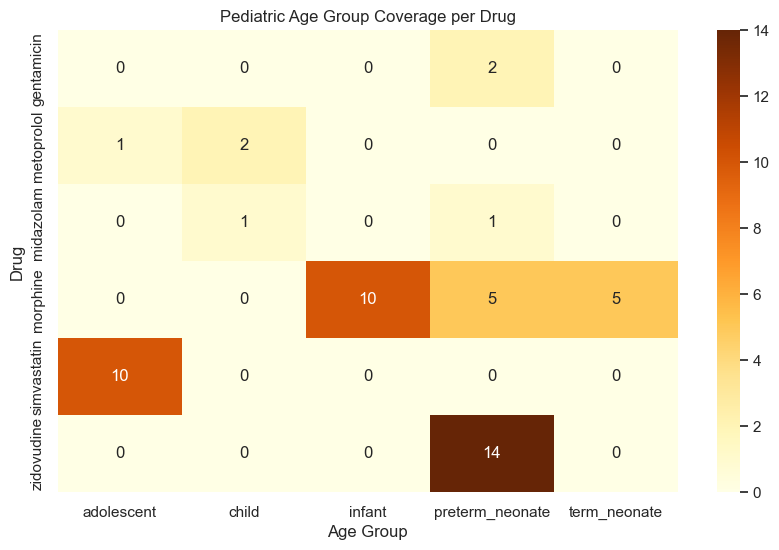

Route coverage table saved: /Users/cmontefusco/Pediatric PK Data Repository/data/curated/regulatory_summary/route_coverage.csv
Route coverage figure saved: /Users/cmontefusco/Pediatric PK Data Repository/figures/regulatory/route_coverage.png


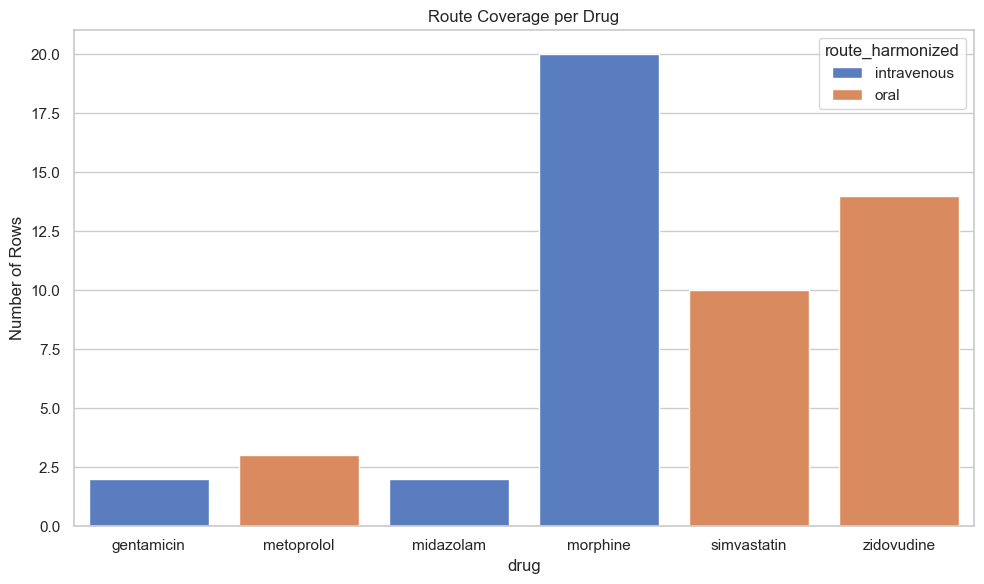

Pathway coverage table saved: /Users/cmontefusco/Pediatric PK Data Repository/data/curated/regulatory_summary/pathway_coverage.csv
Pathway coverage figure saved: /Users/cmontefusco/Pediatric PK Data Repository/figures/regulatory/pathway_coverage.png


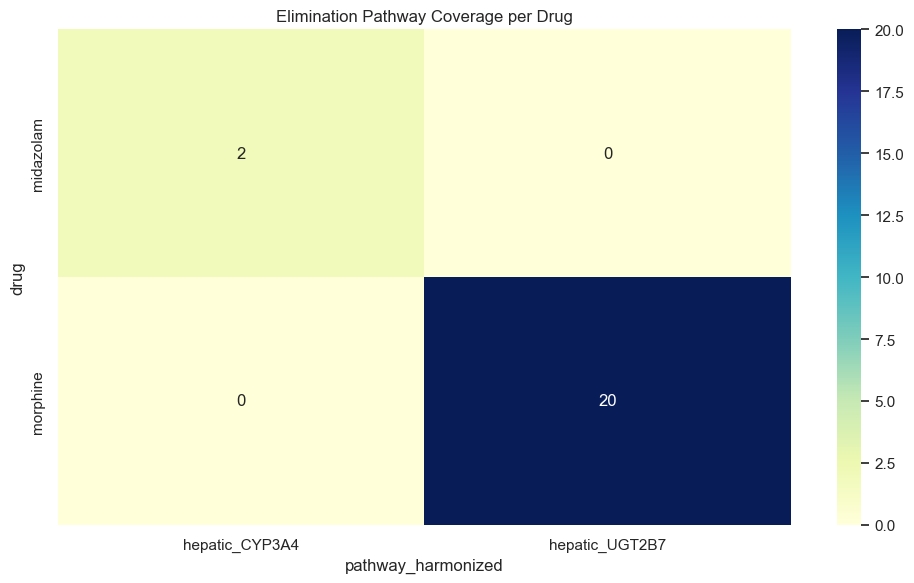

Study subject counts saved: /Users/cmontefusco/Pediatric PK Data Repository/data/curated/regulatory_summary/study_subject_counts.csv


,study_id,drug,n_subjects
0,genta_neonate_2013_subj1,gentamicin,1
1,genta_newborn_group_agg,gentamicin,1
2,metoprolol_fda_bpca,metoprolol,3
3,morph_iv_surgery_1998_agg,morphine,20
4,simva_pbpk_children_2019,simvastatin,10
5,vet_et_al_2014_agg,midazolam,2
6,zidovudine_premature_pair_visit1,zidovudine,7
7,zidovudine_premature_pair_visit2,zidovudine,7


In [2]:
# 5_regulatory_summary_figures.ipynb
# Notebook to generate regulatory-ready summary tables and figures for EMA pediatric PBPK qualification

# ----------------------------------
# 1. Import libraries
# ----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid', palette='muted')

# ----------------------------------
# 2. Load harmonized dataset
# ----------------------------------
HARMONIZED_FILE = '/data/curated/pediatric_pk_master_harmonized.csv'
df = pd.read_csv(HARMONIZED_FILE)
print('Harmonized dataset preview:')
display(df.head())

# ----------------------------------
# 3. Assign pediatric age groups (Option 1)
# ----------------------------------
AGE_GROUPS = {
    'preterm_neonate': (0, 0.08),  # ~0-28 days
    'term_neonate': (0.08, 0.28),  # 29-90 days
    'infant': (0.28, 1),           # 91 days - 1 year
    'child': (1, 12),               # 1-12 years
    'adolescent': (12, 18),         # 12-18 years
    'adult': (18, 100)
}

def assign_age_group(age):
    for group, (start, end) in AGE_GROUPS.items():
        if pd.notna(age) and start <= age < end:
            return group
    return 'unknown'

df['age_group_pbpk'] = df['age_years'].apply(assign_age_group)

# ----------------------------------
# 4. Create output folders
# ----------------------------------
FIG_DIR = 'figures/regulatory'
os.makedirs(FIG_DIR, exist_ok=True)
TABLE_DIR = 'data/curated/regulatory_summary'
os.makedirs(TABLE_DIR, exist_ok=True)

# ----------------------------------
# 5. Age group coverage per drug
# ----------------------------------
age_coverage = pd.crosstab(df['drug'], df['age_group_pbpk'])
age_coverage_file = os.path.join(TABLE_DIR, 'age_group_coverage.csv')
age_coverage.to_csv(age_coverage_file)
print(f'Age group coverage table saved: {age_coverage_file}')

plt.figure(figsize=(10,6))
sns.heatmap(age_coverage, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Pediatric Age Group Coverage per Drug')
plt.ylabel('Drug')
plt.xlabel('Age Group')
age_fig = os.path.join(FIG_DIR, 'age_group_coverage.png')
plt.savefig(age_fig)
print(f'Age group coverage figure saved: {age_fig}')
plt.show()

# ----------------------------------
# 6. Route coverage per drug
# ----------------------------------
route_counts = df.groupby(['drug','route_harmonized']).size().reset_index(name='count')
route_table_file = os.path.join(TABLE_DIR, 'route_coverage.csv')
route_counts.to_csv(route_table_file, index=False)
print(f'Route coverage table saved: {route_table_file}')

plt.figure(figsize=(10,6))
sns.barplot(data=route_counts, x='drug', y='count', hue='route_harmonized')
plt.title('Route Coverage per Drug')
plt.ylabel('Number of Rows')
plt.tight_layout()
route_fig = os.path.join(FIG_DIR, 'route_coverage.png')
plt.savefig(route_fig)
print(f'Route coverage figure saved: {route_fig}')
plt.show()

# ----------------------------------
# 7. Elimination pathway coverage per drug
# ----------------------------------
pathway_counts = pd.crosstab(df['drug'], df['pathway_harmonized'])
pathway_table_file = os.path.join(TABLE_DIR, 'pathway_coverage.csv')
pathway_counts.to_csv(pathway_table_file)
print(f'Pathway coverage table saved: {pathway_table_file}')

plt.figure(figsize=(10,6))
sns.heatmap(pathway_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Elimination Pathway Coverage per Drug')
plt.tight_layout()
pathway_fig = os.path.join(FIG_DIR, 'pathway_coverage.png')
plt.savefig(pathway_fig)
print(f'Pathway coverage figure saved: {pathway_fig}')
plt.show()

# ----------------------------------
# 8. Patient counts per study
# ----------------------------------
study_counts = df.groupby(['study_id','drug']).size().reset_index(name='n_subjects')
study_counts_file = os.path.join(TABLE_DIR, 'study_subject_counts.csv')
study_counts.to_csv(study_counts_file, index=False)
print(f'Study subject counts saved: {study_counts_file}')
display(study_counts)
